In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address', 'Longitude', 'Latitude'], axis=1)
x.head()
colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]
class K_Means:
    def __init__(self, k=7, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) for centroid in self.centroids
                ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [3]:
X_train, testSet = train_test_split(x, test_size=0.2)

In [4]:
x_array = np.array(X_train)
print(x_array)

[[6.75000000e-03 4.52500000e-02 4.25000000e-03 1.02500000e+00
  6.27500000e+01 3.35000000e+01]
 [4.41666667e-03 2.75833333e-02 4.34583333e-02 6.41666667e-01
  1.05541667e+02 2.97916667e+01]
 [5.14285714e-03 4.22142857e-02 2.55000000e-02 6.14285714e-01
  7.79285714e+01 4.27142857e+01]
 ...
 [5.16666667e-03 1.52777778e-02 5.37222222e-02 3.00000000e-01
  3.45000000e+01 8.68888889e+01]
 [5.87500000e-03 2.37916667e-02 3.32500000e-02 6.45833333e-01
  2.65000000e+01 1.69583333e+01]
 [7.10000000e-03 3.53000000e-02 5.02000000e-02 7.50000000e-01
  9.64000000e+01 3.80000000e+01]]


In [5]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[7.18750000e-01, 6.54166667e-01, 3.07835821e-02, 9.06250000e-01,
        1.84789913e-02, 3.49898580e-02],
       [4.27083333e-01, 3.59722222e-01, 5.67216003e-01, 4.27083333e-01,
        3.08828632e-02, 3.12288709e-02],
       [5.17857143e-01, 6.03571429e-01, 3.21517413e-01, 3.92857143e-01,
        2.28787511e-02, 4.43349754e-02],
       ...,
       [5.20833333e-01, 1.54629630e-01, 7.07642344e-01, 5.55111512e-17,
        1.02902618e-02, 8.91368041e-02],
       [6.09375000e-01, 2.96527778e-01, 4.27549751e-01, 4.32291667e-01,
        7.97132957e-03, 1.82133198e-02],
       [7.62500000e-01, 4.88333333e-01, 6.59452736e-01, 5.62500000e-01,
        2.82330000e-02, 3.95537525e-02]])

In [6]:
clf = K_Means()
clf.fit(x_scaled)

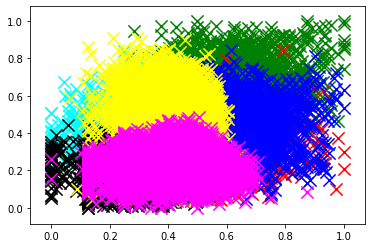

In [7]:
list_class = []
for centroid in clf.centroids:
    plt.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1],
        marker='o', color='k', s=150, linewidths=5
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(
            featureset[0], featureset[1],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()

In [8]:
X_train['Cluster'] = list_class
X_train.sample()

SO2       NO2        O3        CO        PM10      PM2.5  Cluster
18991  0.005208  0.037833  0.019458  0.470833  114.041667  34.708333        1

In [9]:
test_array = np.array(testSet)

In [10]:
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test_array)
test_scaled

array([[0.53125   , 0.56144068, 0.14      , 0.20833333, 0.04610379,
        0.04421478],
       [0.34375   , 0.23658192, 0.26882353, 0.22395833, 0.02404496,
        0.019038  ],
       [0.25      , 0.45762712, 0.07941176, 0.015625  , 0.00874746,
        0.0088585 ],
       ...,
       [0.3125    , 0.22669492, 0.37764706, 0.15625   , 0.04432894,
        0.04405937],
       [0.4702381 , 0.4511703 , 0.20840336, 0.32142857, 0.04196851,
        0.04173928],
       [0.375     , 0.38347458, 0.17764706, 0.19791667, 0.0300879 ,
        0.03947471]])

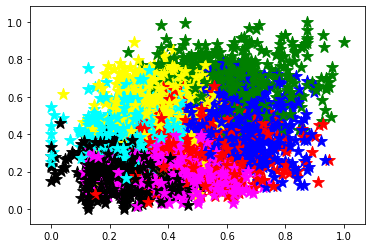

In [11]:
for clas in test_scaled:
    classification = clf.predict(clas)
    plt.scatter( clas[0], clas[1],color = colors[classification],marker='*', s=150, linewidths=1)
plt.show()